# Netflix EDA 

Performing Exploratory Data Analysis to understand the dataset.

### Tasks:

*   Understand the Dataset, types and missing values.
*   Clean the Dataset and handle the missing value.
*   Perform Data Visualization.
*   Creat Final Summary report.





In [1]:
# FIltering out the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the required libraries
import numpy as np                    # Helps in working arrays & matrices 
import pandas as pd                   # Helps in reading dataset / making dataframes / manuplating dataframes 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Reading our dataset with the help of read.csv
df = pd.read_csv('/content/netflix_titles.csv')

In [4]:
# Lets check first 5 rows of our dataset.
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
# Check the numbers of rows and colmns in the dataframe.
df.shape

(8807, 12)

In [8]:
# Check the summary of numeric columns 
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [7]:
# Check the columns wise info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [9]:
# Checking the missing vaues
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

## Adjust Data Type & Fill-in Missing Values

Verify Data types makes sense. All except release_year are objective strings as expected. Establish information from previous test.


### The following do not required any fills :

*   type
*   title
*   release_year
*   listed_in
*   description


### The following are missing data :


*   duration
*   rating
*   date_added
*   cast
*   country
*   director
*   Check data types, update types where needed and proceed.

data_added to be updated to datetime 'Unavailable' will be subsituted in for any nulls of fields with obeject/string data types. This applies to everything except for release year.


In [10]:
# Update date _added to datetime and check
df['date_added'] = pd.to_datetime(df['date_added'])

In [11]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Handling Missing Values
rating, cast, country and director have the nulls field with 'Unavailable'

In [18]:
df.fillna({'rating':'Unavailable','cast':'Unavailable','country':'Unavailable','director':'Unavailable'}, inplace = True)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unavailable,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unavailable,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unavailable,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unavailable,Unavailable,Unavailable,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unavailable,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


For nulls in date_added, missing date_added is to be subsituted in with the most recent date from date_added. This is because Netflix has the tendency to add more content over time. Other viable options would be finding actual dates and or inputting them manually or dropping the data from the results, since the amount of missing data rather small.

In [14]:
# Checking the null values in columns
df[df.date_added.isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,Unavailable,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaT,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,Unavailable,Anthony Bourdain,United States,NaT,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6795,s6796,TV Show,Frasier,Unavailable,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaT,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6806,s6807,TV Show,Friends,Unavailable,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaT,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
6901,s6902,TV Show,Gunslinger Girl,Unavailable,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaT,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
7196,s7197,TV Show,Kikoriki,Unavailable,Igor Dmitriev,Unavailable,NaT,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
7254,s7255,TV Show,La Familia P. Luche,Unavailable,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaT,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
7406,s7407,TV Show,Maron,Unavailable,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaT,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
7847,s7848,TV Show,Red vs. Blue,Unavailable,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaT,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
8182,s8183,TV Show,The Adventures of Figaro Pho,Unavailable,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaT,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


In [16]:
most_recent_entry_date = df['date_added'].max()
df.fillna({'date_added': most_recent_entry_date}, inplace = True)

Proof of concept that the data filled in the null data_added from ashow_id example that previously was missing the date_added.

In [19]:
# Checking the null value was replaced by the value.
df[df.show_id == 's6067']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,Unavailable,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,2021-09-25,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


## Additional Data Cleansing

### Duration Data Input Error

The missing duration are all movies by Louis C.K. Normally, we would likely fill the duration with the mean duration of movies from the lable. In this case it appears that the actual duration was input into the rating column, so one solution is to move the rating data into the duration and make the rating information 'Unavailable' like the others nulls.   

In [20]:
# Check the nulls values first
df[df.duration.isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


Check to make sure there is no other content with the same director to avoid accidental overwriting.

In [21]:
df[df.director == 'Louis C.K.'].head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [25]:
# Overwrite and check
#Loc helps us to easily accessing the colmns by names

df.loc[df['director'] == 'Louis C.K.' , 'duration'] = df['rating']
df[df.director == 'Louis C.K.'].head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,66 min,Movies,The comic puts his trademark hilarious/thought...


In [26]:
# Second Overwrite and Check

df.loc[df['director'] == 'Louis C.K.' , 'rating'] = 'Unavailable'
df[df.director == 'Louis C.K.'].head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,Unavailable,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,Unavailable,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,Unavailable,66 min,Movies,The comic puts his trademark hilarious/thought...


## Visualizations

Let's take a look at types of shows that has been watched on Netflix.

In [27]:
# Vale_count method shows us diiferent categories in a given columns
df.type.value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

Text(0.5, 1.0, 'Count vs Type of Shows')

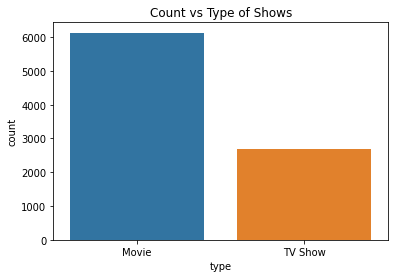

In [28]:
# Foe better understanding create a count plot for above information.
sns.countplot( x = 'type' , data = df)
plt.title('Count vs Type of Shows')

On Netflix there are more no. of Movies as compared to tv shows.

### Country Analysis

In [30]:
df['country'].value_counts().head(10)

United States     2818
India              972
Unavailable        831
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Name: country, dtype: int64

Text(0.5, 1.0, 'Country wise content on Netflix')

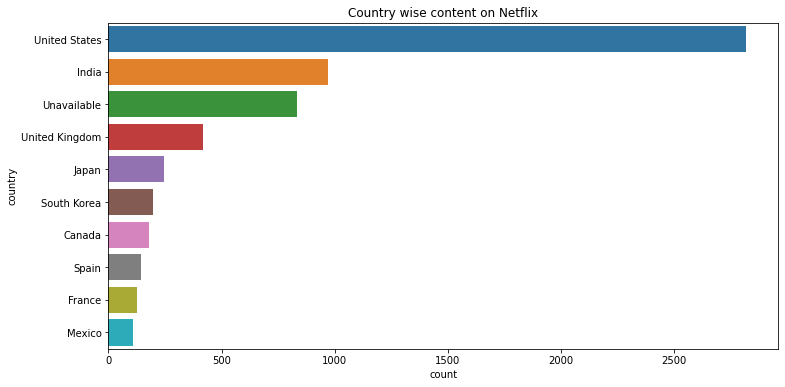

In [31]:
plt.figure(figsize=(12,6))
sns.countplot( y = 'country', order = df['country'].value_counts().index[0:10], data = df )
plt.title('Country wise content on Netflix')

In [39]:
#  Now Checking type of content based on country
movies_country = df[df['type'] == 'Movie']
tv_shows_country = df[df['type'] == 'TV Show']

Text(0.5, 1.0, 'Top 10 Countries Producing TV Shows in Netflix')

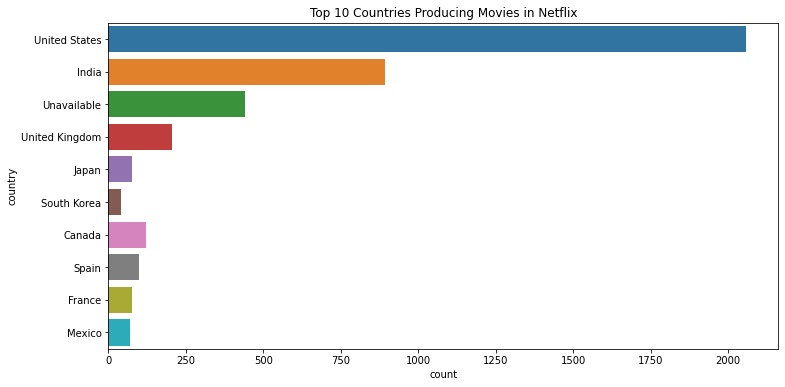

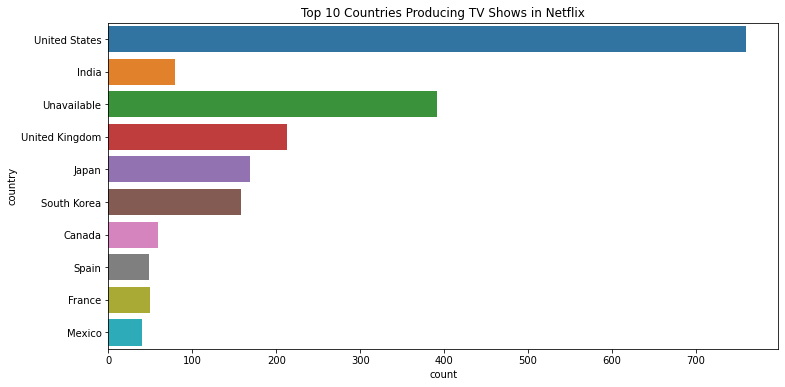

In [40]:
plt.figure(figsize=(12,6))
sns.countplot(y = 'country' , order = df['country'].value_counts().index[0:10], data = movies_country)
plt.title('Top 10 Countries Producing Movies in Netflix')




plt.figure(figsize=(12,6))
sns.countplot(y = 'country' , order = df['country'].value_counts().index[0:10], data = tv_shows_country)
plt.title('Top 10 Countries Producing TV Shows in Netflix')

In [41]:
# Lets check whats are the major rating given on the Netflix shows.

df.rating.value_counts()

TV-MA          3207
TV-14          2160
TV-PG           863
R               799
PG-13           490
TV-Y7           334
TV-Y            307
PG              287
TV-G            220
NR               80
G                41
Unavailable       7
TV-Y7-FV          6
NC-17             3
UR                3
Name: rating, dtype: int64

Text(0.5, 1.0, 'Rating on shows of Netflix vs Count')

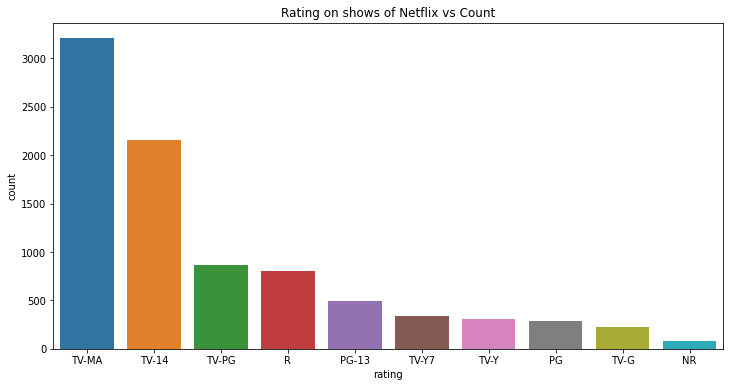

In [43]:
# Creating a countplot for ratings.

plt.figure(figsize=(12,6))
sns.countplot( x = 'rating', order = df['rating'].value_counts().index[0:10], data = df)
plt.title('Rating on shows of Netflix vs Count')

Most of the Shows has TV-MA and TV-14 Ratings.

In [44]:
# noe we are checking in which year Netflic produced most no. of content.

df.release_year.value_counts()[:20]

2018    1147
2017    1032
2019    1030
2020     953
2016     902
2021     592
2015     560
2014     352
2013     288
2012     237
2010     194
2011     185
2009     152
2008     136
2006      96
2007      88
2005      80
2004      64
2003      61
2002      51
Name: release_year, dtype: int64

Text(0.5, 1.0, 'Content Release in Years on Netflix vs Count')

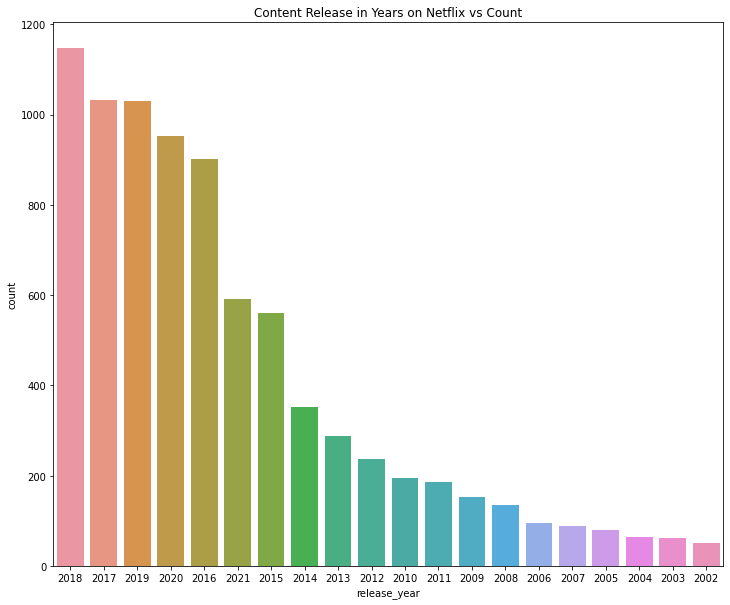

In [51]:
# lets visualized this data
plt.figure(figsize=(12,10))
sns.countplot(x = 'release_year', order = df['release_year'].value_counts().index[:20], data = df)
plt.title('Content Release in Years on Netflix vs Count')

## Popular Genres Analysis

Text(0.5, 1.0, 'Top 20 Genres on Netflix')

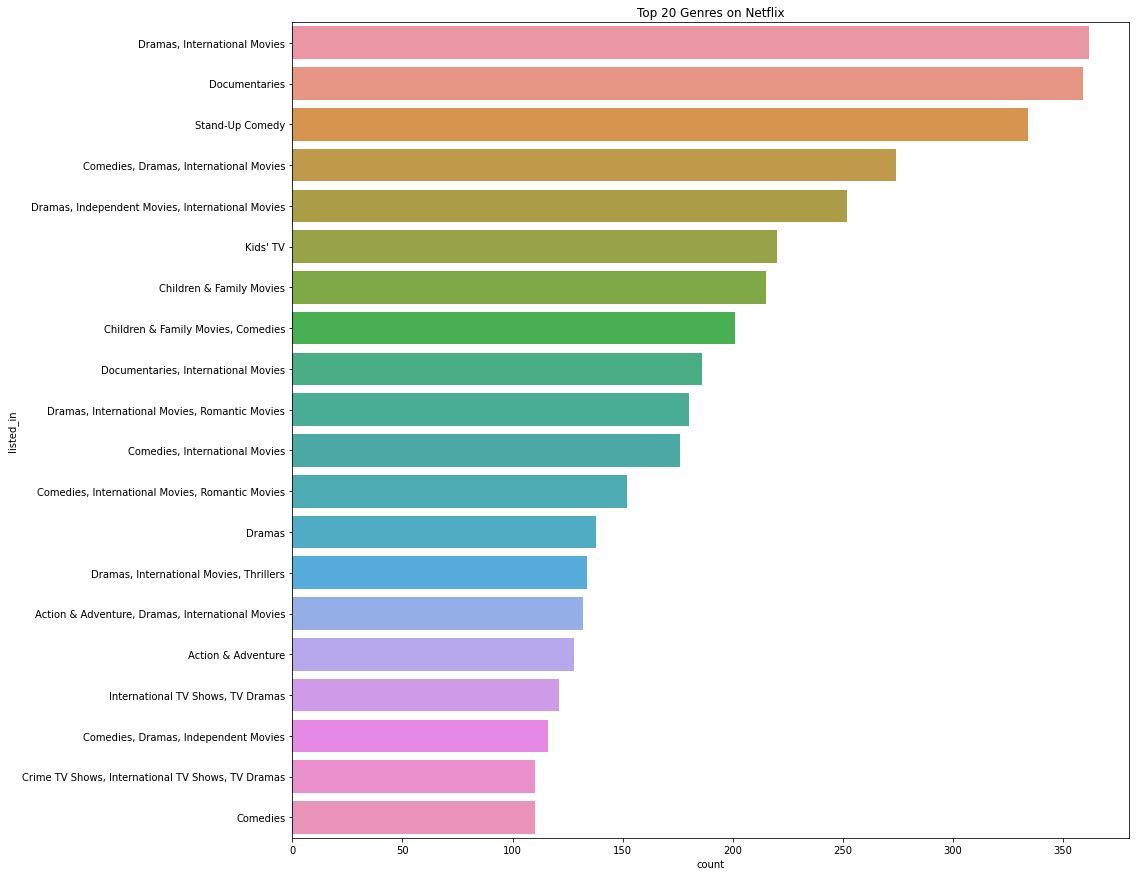

In [49]:
plt.figure(figsize=(15,15))
sns.countplot(y = 'listed_in', order = df['listed_in'].value_counts().index[0:20], data = df)
plt.title('Top 20 Genres on Netflix')

## Summary

So far we had perform lots of operations over the dataset to dig out some very usefull information from it. If, we had to colclude the dataset in few lines, than we can say that :



*   Netflix has more Movies than TV Shows.
*   Most numbers of Movies and TV Shows produced by the United State,followed by India who has produced the second most no. of movies on Netflix.
*   Most of the content on Netflix (Movies than TV Shows) is for mature audience.
*   2018 is the year in which Netflix released alot more content as compared tto other years.
*   International Movies and Drama are the most popular genres on Netflix.
